In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Birdsals Method for Initialization

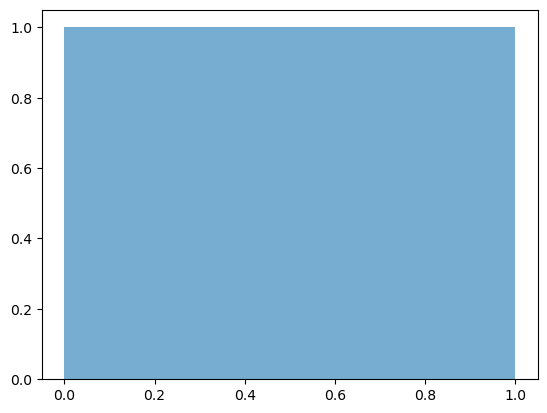

In [60]:
p_count = 1000

positions = np.linspace(0, 1, p_count)

for x_0 in positions: 
    x_0 += 0.001 * np.cos(2 * np.pi * x_0)

plt.figure()
plt.hist(positions, bins=50, density=True, alpha=0.6, label="Sampled Distribution")
plt.show()

# Trying different PDF's for an initial condition

## $\sin(\pi x)$

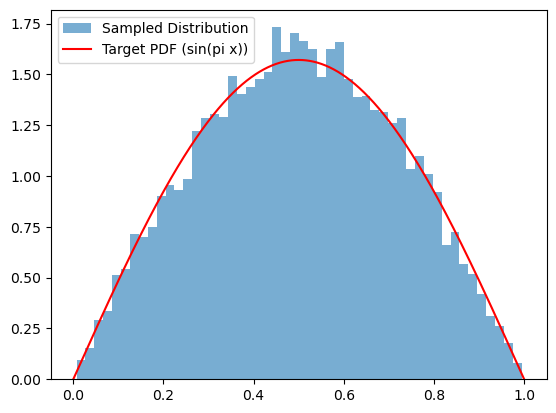

In [61]:
num_samples = 10000

def inverse_cdf(u):
    return np.arccos(1 - 2 * u) / np.pi

u_samples = np.random.uniform(0, 1, num_samples)
samples = inverse_cdf(u_samples)

x = np.linspace(0, 1, 1000)
pdf = np.pi / 2 * np.sin(np.pi * x)  # Target PDF (not normalized since range is [0, 1])
plt.hist(samples, bins=50, density=True, alpha=0.6, label="Sampled Distribution")
plt.plot(x, pdf, label="Target PDF (sin(pi x))", color="red")
plt.legend()
plt.show()

# $\cos(\pi x ) + 1$

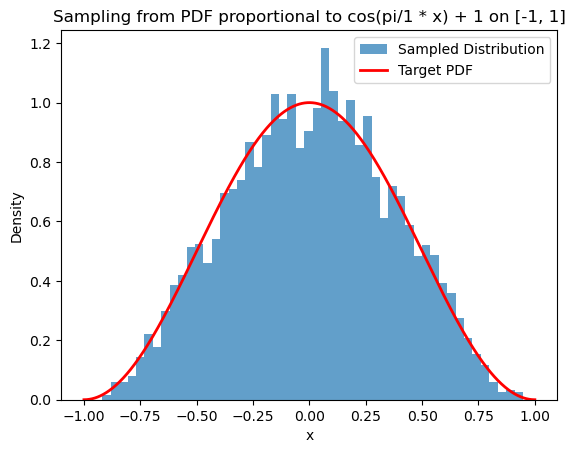

In [62]:
def sample_cos_pdf(a, num_samples):
    samples = []
    max_pdf = 2
    while len(samples) < num_samples:
        x_candidate = np.random.uniform(-a, a)
        # Compute the PDF value at the candidate sample
        pdf_value = (np.cos(np.pi * x_candidate / a) + 1) / (2 * a)
        # Draw a uniform random number to decide acceptance
        u = np.random.uniform(0, max_pdf / (2 * a))
        
        if u <= pdf_value:
            samples.append(x_candidate)
    
    return np.array(samples)

# Parameters
a = 1  # Change as needed
num_samples = 5000

# Sample from the PDF
samples = sample_cos_pdf(a, num_samples)

# Plot the results
x = np.linspace(-a, a, 1000)
pdf = (np.cos(np.pi * x / a) + 1) / (2 * a)

plt.hist(samples, bins=50, density=True, alpha=0.7, label='Sampled Distribution')
plt.plot(x, pdf, label='Target PDF', color='red', linewidth=2)
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.title(f"Sampling from PDF proportional to cos(pi/{a} * x) + 1 on [-{a}, {a}]")
plt.show()


# Initial Conditions

In [63]:
data = pd.read_csv("perturbation_init_out_rays_0001.csv")
print(len(data["x"]))
plt.figure() 
# plt.plot(data["x"], np.ones_like(data["x"]), "o")

plt.hist(data["x"], bins=50, alpha=0.7, label='Sampled Distribution')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'perturbation_init_out_rays_0001.csv'

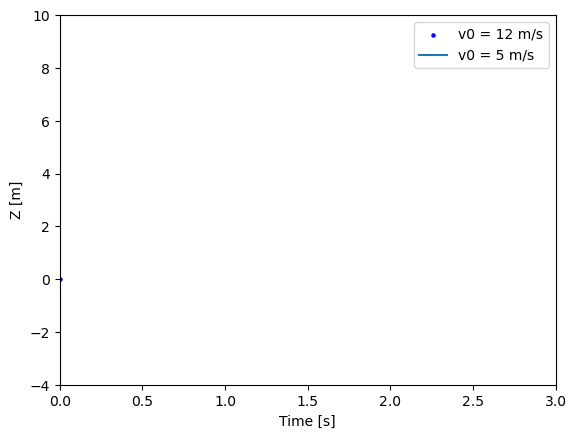

In [ ]:
import matplotlib.animation as animation
fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t

scat = ax.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=30)
plt.show()

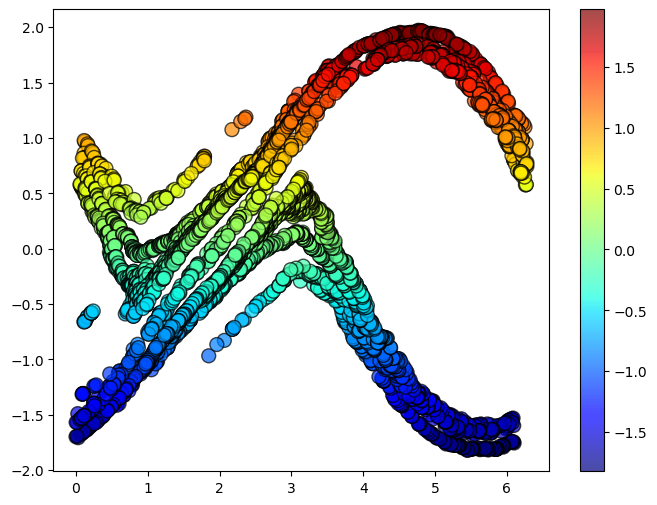

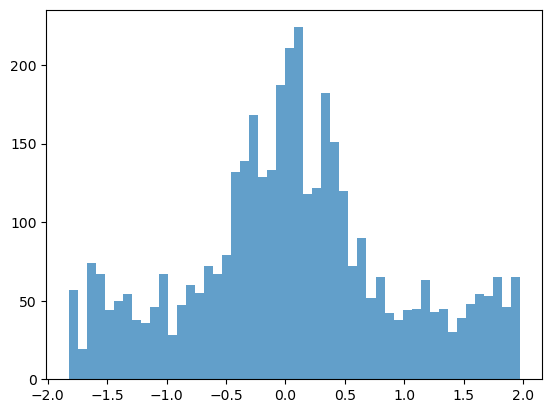

In [ ]:
# particles = pd.read_csv("two-steram_particle_data_ray_data_0001.csv")
particles = pd.read_csv("perturbation_init_out_rays_0300.csv")

# Create scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(particles['x'], particles['v_x'], c=particles['v_x'], cmap='jet', s=100, edgecolor='k', alpha=0.7)

# Add color bar to represent heatmap scale
plt.colorbar(scatter)
# plt.ylim(top=4, bottom=-4)
plt.show()
plt.figure() 

plt.hist(particles['v_x'], bins=50, alpha=0.7)
plt.show()

In [70]:
csv_files = [f"perturbation_init_out_rays_{i:04d}.csv" for i in range(5, 505, 5)]

print(csv_files)

['perturbation_init_out_rays_0005.csv', 'perturbation_init_out_rays_0010.csv', 'perturbation_init_out_rays_0015.csv', 'perturbation_init_out_rays_0020.csv', 'perturbation_init_out_rays_0025.csv', 'perturbation_init_out_rays_0030.csv', 'perturbation_init_out_rays_0035.csv', 'perturbation_init_out_rays_0040.csv', 'perturbation_init_out_rays_0045.csv', 'perturbation_init_out_rays_0050.csv', 'perturbation_init_out_rays_0055.csv', 'perturbation_init_out_rays_0060.csv', 'perturbation_init_out_rays_0065.csv', 'perturbation_init_out_rays_0070.csv', 'perturbation_init_out_rays_0075.csv', 'perturbation_init_out_rays_0080.csv', 'perturbation_init_out_rays_0085.csv', 'perturbation_init_out_rays_0090.csv', 'perturbation_init_out_rays_0095.csv', 'perturbation_init_out_rays_0100.csv', 'perturbation_init_out_rays_0105.csv', 'perturbation_init_out_rays_0110.csv', 'perturbation_init_out_rays_0115.csv', 'perturbation_init_out_rays_0120.csv', 'perturbation_init_out_rays_0125.csv', 'perturbation_init_out_r